In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

file_path = 'Train_v1.txt'
column_names = ['toRemove', 'isSarcastic', 'text']

# Read the dataset
dataset = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

In [3]:
import My_Preprocessing as prep_funct

#prep_funct.remove_Sarcasm_hashtag()

dataset = pd.read_json("cleaned_#sarcasm.json")

print(dataset.count())

# Assuming "is_sarcastic" is the column you're interested in
sarcastic_counts = dataset['isSarcastic'].value_counts()

print()
print()

# Display the result
print("Number of rows for each value in the 'isSarcastic' column:")

isSarcastic    39780
text           39780
dtype: int64


Number of rows for each value in the 'isSarcastic' column:


In [5]:
# Assuming 'dataset' is your DataFrame
# Shuffle the dataset
dataset_shuffled = dataset.sample(frac=1, random_state=42)

data_sample = len(dataset) // 2

# Take the first quarter of the shuffled dataset
dataset = dataset_shuffled.iloc[:data_sample]

# Now, quarter_dataset contains a representative 1/4 subset of your original dataset


total_rows = len(dataset)
print(total_rows)

19890


In [13]:
label_counts = dataset['isSarcastic'].value_counts()
print(label_counts)


isSarcastic
0    10633
1     9257
Name: count, dtype: int64


In [4]:
import text_mining_utils as tmu

In [6]:
baseline_count_matrix = tmu.build_count_matrix(dataset.text)
baseline_count_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
baseline_tf_matrix = tmu.build_tf_matrix(dataset.text)
baseline_tf_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
baseline_tfidf_matrix = tmu.build_tfidf_matrix(dataset.text)
baseline_tfidf_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,0.145916,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.124995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.084026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#KMeans
matrix = baseline_count_matrix


model, cluster_labels, cluster_centers = tmu.k_means_clustering(matrix, k=2, initialisation='random')

In [11]:
from sklearn.metrics import adjusted_rand_score,fowlkes_mallows_score


y = dataset.isSarcastic

print("KMeans Random - ARI score:", adjusted_rand_score(cluster_labels, list(y)))

KMeans Random - ARI score: 0.0026415993753363936


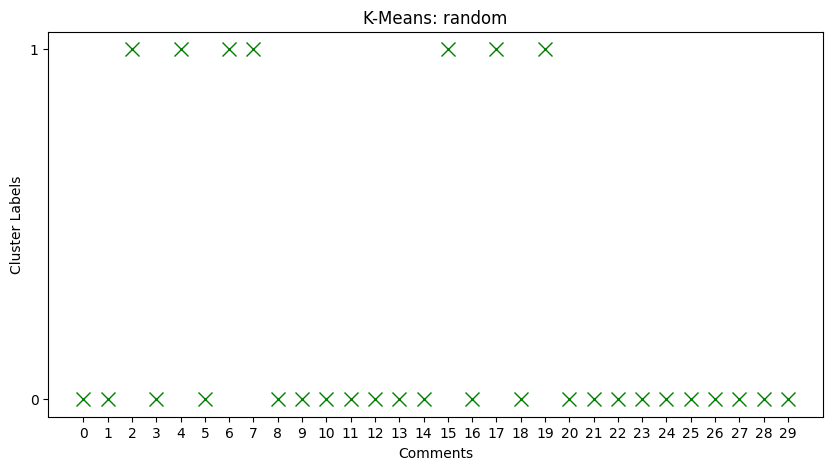

In [16]:
import matplotlib.pyplot as plt

# plot cluster allocation of Kmeans random (only for the first 30 rows)
plt.figure(figsize=(10, 5))
tmu.plot_clusters(matrix[:30], cluster_labels[:30],
"K-Means: random", 'Comments', 'Cluster Labels')


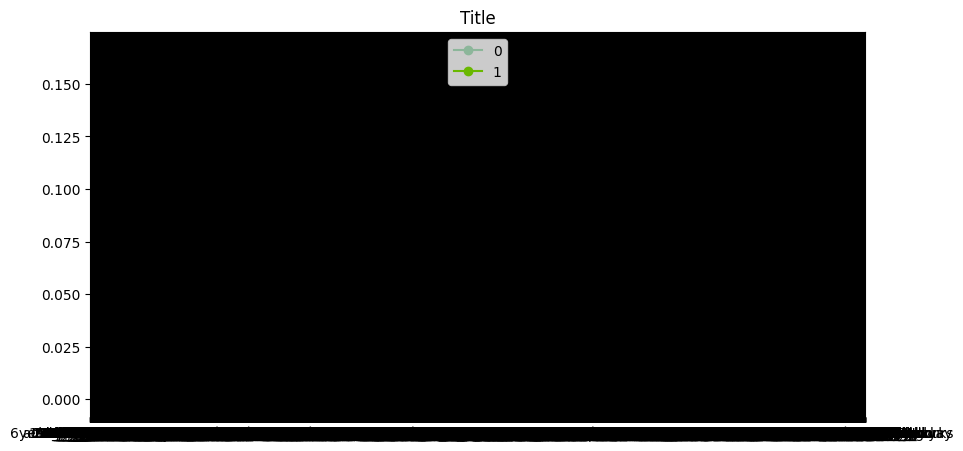

In [26]:
#centroids
X_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
centers = pd.DataFrame(cluster_centers, columns=vectorizer.get_feature_names_out())
labels = dataset['isSarcastic']
title = 'Title'

tmu.centroids_across_terms(X_df, centers, labels, title)

In [22]:
matrix = dataset['text']
print(X.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [15]:
#agglom clustering
X = dataset['text']


tmu.agglom_clustering(X, k=2, distance_threshold=None, linkMethod='ward')

TypeError: agglom_clustering() got an unexpected keyword argument 'distance_threshold'

In [29]:
single_model, single_labels= tmu.agglom_clustering(matrix, k=2,
simMethod='cosine', linkMethod='ward')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [13]:
#visualise

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['text'])

# Visualize the dendrogram
tmu.visualise_dendrogram(X, linkageMethod='single', xlabel='', ylabel='')

ValueError: setting an array element with a sequence.

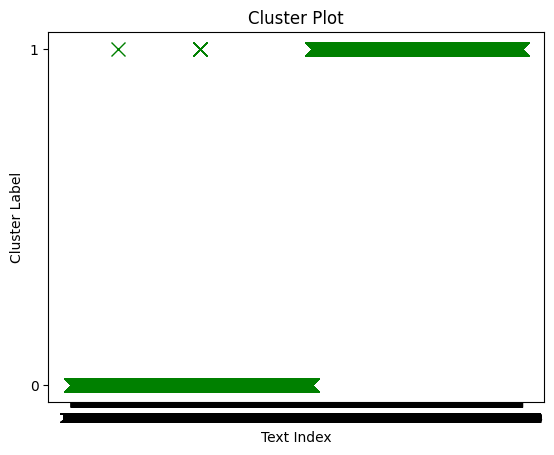

In [10]:
#plot

# Prepare the data for plotting
X = dataset['text']
labels = dataset['isSarcastic']  # Assuming 'isSarcastic' contains the labels
title = 'Cluster Plot'
xlabel = 'Text Index'
ylabel = 'Cluster Label'

# Call the function to plot clusters
tmu.plot_clusters(X, labels, title, xlabel, ylabel)